# Assignment 1

Import packages

In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection  import train_test_split
from autorank import autorank, create_report, plot_stats

Read data

In [2]:
ar = pd.read_csv('arrhythmia.csv')
ca = pd.read_csv('caesarian.csv')
wp = pd.read_csv('website-phishing.csv')

Arrhythmia

RankResult(rankdf=
              meanrank    median       mad  ci_lower  ci_upper effect_size  \
Bagging           1.50  0.702358  0.087555  0.550868  0.803419         0.0   
ExtraTrees        2.00  0.682712  0.064756  0.565757  0.752137    0.255126   
RandomForest      2.65  0.680737  0.074962  0.563275  0.735043    0.265281   
AdaBoost          4.15  0.624769   0.04542  0.563275  0.666667    1.112455   
DecisionTree      4.70  0.604606  0.039609  0.183623  0.679012    1.438564   

               magnitude  
Bagging       negligible  
ExtraTrees         small  
RandomForest       small  
AdaBoost           large  
DecisionTree       large  
pvalue=3.885067488345842e-06
cd=1.9288111473713958
omnibus=friedman
posthoc=nemenyi
all_normal=False
pvals_shapiro=[0.0004982678801752627, 0.07376586645841599, 0.16369430720806122, 0.5802350640296936, 0.57322096824646]
homoscedastic=True
pval_homogeneity=0.6385993426914864
homogeneity_test=levene
alpha=0.05
alpha_normality=0.01
num_samples=10
poste

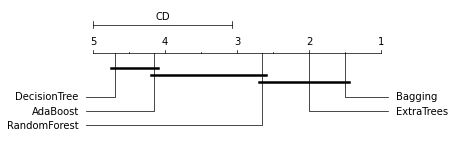

In [3]:
ar.drop(' J', axis=1, inplace=True)
ar.replace('?', np.nan, inplace=True)
ar.dropna(inplace=True)
y = ar['class']
X = ar.drop('class', axis=1)

RANDOM_STATE = 1234
np.random.seed(RANDOM_STATE)
df = pd.DataFrame(columns=['DecisionTree', 'RandomForest', 'AdaBoost', 'Bagging', 'ExtraTrees'])
for x in np.random.rand(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=x, random_state=RANDOM_STATE)

    dt = DecisionTreeClassifier(random_state=RANDOM_STATE)
    dt.fit(X_train, y_train)
    
    rf = RandomForestClassifier(max_depth=10, random_state= RANDOM_STATE)
    rf.fit(X_train, y_train)
    
    ab = AdaBoostClassifier(random_state=RANDOM_STATE)
    ab.fit(X_train, y_train)
    
    bagging = BaggingClassifier(random_state=RANDOM_STATE)
    bagging.fit(X_train, y_train)
    
    et = ExtraTreesClassifier(random_state=RANDOM_STATE)
    et.fit(X_train, y_train)
    
    df = df.append({'DecisionTree':dt.score(X_test, y_test), 'RandomForest':rf.score(X_test, y_test), 'AdaBoost':ab.score(X_test, y_test), 'Bagging':bagging.score(X_test, y_test), 'ExtraTrees':et.score(X_test, y_test)}, ignore_index=True)

result = autorank(df, verbose=False)
print(result)
create_report(result)
plot_stats(result)

Caesarian

In [4]:
y = ca['class']
X = ca.drop('class', axis=1)

RANDOM_STATE = 1234
np.random.seed(RANDOM_STATE)
df = pd.DataFrame(columns=['DecisionTree', 'RandomForest', 'AdaBoost', 'Bagging', 'ExtraTrees'])
for x in np.random.rand(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=x, random_state=RANDOM_STATE)

    dt = DecisionTreeClassifier(random_state=RANDOM_STATE)
    dt.fit(X_train, y_train)
    
    rf = RandomForestClassifier(max_depth=10, random_state= RANDOM_STATE)
    rf.fit(X_train, y_train)
    
    ab = AdaBoostClassifier(random_state=RANDOM_STATE)
    ab.fit(X_train, y_train)
    
    bagging = BaggingClassifier(random_state=RANDOM_STATE)
    bagging.fit(X_train, y_train)
    
    et = ExtraTreesClassifier(random_state=RANDOM_STATE)
    et.fit(X_train, y_train)
    
    df = df.append({'DecisionTree':dt.score(X_test, y_test), 'RandomForest':rf.score(X_test, y_test), 'AdaBoost':ab.score(X_test, y_test), 'Bagging':bagging.score(X_test, y_test), 'ExtraTrees':et.score(X_test, y_test)}, ignore_index=True)

result = autorank(df, verbose=False)
print(result)

RankResult(rankdf=
              meanrank      mean       std  ci_lower  ci_upper effect_size  \
RandomForest      2.60  0.583565  0.074974  0.529434  0.637697         0.0   
ExtraTrees        2.85  0.584706  0.085837  0.530574  0.638838    -0.01415   
DecisionTree      3.10  0.568558  0.079160  0.514426   0.62269    0.194665   
Bagging           3.20  0.559837  0.096306  0.505705  0.613969    0.274945   
AdaBoost          3.25  0.568462  0.088088   0.51433  0.622594    0.184657   

               magnitude  
RandomForest  negligible  
ExtraTrees    negligible  
DecisionTree  negligible  
Bagging            small  
AdaBoost      negligible  
pvalue=0.9127687660201369
cd=None
omnibus=anova
posthoc=tukeyhsd
all_normal=True
pvals_shapiro=[0.12805140018463135, 0.2545742690563202, 0.01835554651916027, 0.05081353336572647, 0.04389895126223564]
homoscedastic=True
pval_homogeneity=0.9573790050510111
homogeneity_test=bartlett
alpha=0.05
alpha_normality=0.01
num_samples=10
posterior_matrix=
None

/Users/channingwang/opt/anaconda3/envs/compsci762/lib/python3.9/site-packages/statsmodels/sandbox/stats/multicomp.py:775: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.insert(self.groupsunique.astype(str), 0, ''))


Phishing Websites

RankResult(rankdf=
              meanrank      mean       std  ci_lower  ci_upper effect_size  \
ExtraTrees         1.2  0.959933  0.011239  0.948382  0.971483         0.0   
Bagging            2.4  0.952545  0.014957  0.937173  0.967916     0.55846   
RandomForest       2.8  0.947654  0.004647  0.942878  0.952429    1.427799   
DecisionTree       3.9  0.940911  0.021561  0.918753   0.96307     1.10632   
AdaBoost           4.7  0.934629  0.004611   0.92989  0.939367     2.94568   

               magnitude  
ExtraTrees    negligible  
Bagging           medium  
RandomForest       large  
DecisionTree       large  
AdaBoost           large  
pvalue=6.605459954609622e-06
cd=1.9288111473713958
omnibus=friedman
posthoc=nemenyi
all_normal=True
pvals_shapiro=[0.2335275411605835, 0.06855439394712448, 0.02319963276386261, 0.37822917103767395, 0.14493343234062195]
homoscedastic=False
pval_homogeneity=1.4943317185163718e-05
homogeneity_test=bartlett
alpha=0.05
alpha_normality=0.01
num_samples=1

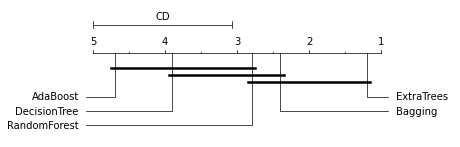

In [5]:
y = wp['  Class ']
X = wp.drop('  Class ', axis=1)

RANDOM_STATE = 1234
np.random.seed(RANDOM_STATE)
df = pd.DataFrame(columns=['DecisionTree', 'RandomForest', 'AdaBoost', 'Bagging', 'ExtraTrees'])
for x in np.random.rand(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=x, random_state=RANDOM_STATE)

    dt = DecisionTreeClassifier(random_state=RANDOM_STATE)
    dt.fit(X_train, y_train)
    
    rf = RandomForestClassifier(max_depth=10, random_state= RANDOM_STATE)
    rf.fit(X_train, y_train)
    
    ab = AdaBoostClassifier(random_state=RANDOM_STATE)
    ab.fit(X_train, y_train)
    
    bagging = BaggingClassifier(random_state=RANDOM_STATE)
    bagging.fit(X_train, y_train)
    
    et = ExtraTreesClassifier(random_state=RANDOM_STATE)
    et.fit(X_train, y_train)
    
    df = df.append({'DecisionTree':dt.score(X_test, y_test), 'RandomForest':rf.score(X_test, y_test), 'AdaBoost':ab.score(X_test, y_test), 'Bagging':bagging.score(X_test, y_test), 'ExtraTrees':et.score(X_test, y_test)}, ignore_index=True)

result = autorank(df, verbose=False)
print(result)
create_report(result)
plot_stats(result)

1. Bagging, Random Forest, Extra Trees did better than others for Arrhythmia, Caesarian, Phishing Websites respectively. The design is to randomize the proportion used for the trainning sets and took the rest as validation sets.
2. Auto Rank support the conclusion
3. AdaBoost did the worst on Caesarian as the data itself has some problems with the right classificaiton and AdaBoost amplified that
4. Random forest can do well on most of the jobs as downsize column and trainning sets at the same time. The only thing is it work best with unprunned deep trees so has to control the max-depth.